# Extreme Gradient Boost (XGBoost)

In [ ]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner, util

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Definição do Modelo

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

O XGBoost (Extreme Gradient Boosting) é um algoritmo de aprendizado de máquina baseado em árvores de decisão que utiliza técnicas de boosting para melhorar a precisão, bastante querido pela literatura devido ao seu alto desempenho para diferentes bases de dados. O boosting é um método iterativo que treina modelos sequencialmente, onde cada modelo tenta corrigir os erros dos modelos anteriores, ou seja, acabamos criando uma árvore desses modelos que tentam corrigir o erro do anterior. 

## 2. Configuração de Hiperparâmetros

In [ ]:
param_distributions_xgb = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

Para o XGBoost avaliamos os seguintes hiperparâmetros: hidden_layer_sizes, activation, solver, alpha, learning_rate, learning_rate_init. O parâmetro **n_estimators**, variando entre 50 e 400, controla o número de árvores na sequência de boosting, valores mais elevados geralmente melhoram a precisão, mas também aumentam o tempo de treinamento. A variação permite explorar o equilíbrio entre precisão e eficiência computacional.

O segundo parâmetro, learning_rate, variando entre 0.01 e 0.2, controla a taxa de aprendizado, que determina a magnitude das atualizações dos pesos em cada iteração de boosting. Assim, Taxas de aprendizado menores exigem mais árvores para convergir, mas podem levar a um modelo mais preciso.

O parâmetro max_depth, variando entre 3 e 10, controla a profundidade máxima das árvores. Árvores mais profundas podem capturar relações complexas, mas também podem levar a overfitting. O min_child_weight, variando entre 1 e 5, controla o peso mínimo das amostras necessárias em um nó folha, permitindo ajustar a granularidade da divisão da árvore, desse modo, valores maiores previnem a criação de nós muito específicos, reduzindo o overfitting.

Nesse interim, o parâmetro gamma, variando entre 0 e 0.3, controla a redução mínima da perda necessária para fazer uma divisão adicional em um nó, valores maiores tornam o modelo mais conservador, reduzindo o overfitting.

Já o parâmetro **subsample**, variando entre 0.6 e 1.0, controla a fração de amostras usadas para treinar cada árvore,valores menores introduzem aleatoriedade, reduzindo a correlação entre as árvores e melhorando a robustez do modelo. Outro parâmetro variado foi o **colsample_bytree**, variando entre 0.6 e 1.0, controla a fração de colunas (características) usadas para treinar cada árvore. Assim, valores menores também introduzem aleatoriedade, reduzindo a correlação entre as árvores e melhorando a robustez do modelo.

Por fim, os parâmetros **reg_alpha** e **reg_lambda**, variando entre 0 e 1, controlam a regularização L1 e L2, respectivamente. A regularização ajuda a prevenir o overfitting, penalizando pesos grandes. A variação permite ajustar o nível de regularização de acordo com a complexidade dos dados.

## 3. Avaliação do Modelo

O modelo **XGBoost** apresentou um desempenho **muito próximo** ao do **Random Forest**, mas com uma grande vantagem em termos de **tempo de execução**. Embora ambos os modelos tenham demonstrado uma performance robusta, o **XGBoost** foi superior por apresentar uma **maior estabilidade** entre os modelos, com os melhores resultados sendo sempre muito próximos. Isso sugere que o modelo é altamente consistente e confiável, o que é uma característica valiosa quando é necessário garantir previsões consistentes e eficientes. Além disso, o modelo teve um desempenho levemente superior ao do **Random Forest**, especialmente considerando o **tempo de computação** significativamente inferior, tornando o **XGBoost** uma excelente escolha para situações onde o tempo de execução é um fator crítico.

**Curva ROC e Matriz de Confusão:**

O modelo **XGBoost** apresentou um desempenho **muito próximo** ao do **Random Forest**, mas com uma grande vantagem em termos de **tempo de execução**. Embora ambos os modelos tenham demonstrado uma performance robusta, o **XGBoost** foi superior por apresentar uma **maior estabilidade** entre os modelos, com os melhores resultados sendo sempre muito próximos. Isso sugere que o modelo é altamente consistente e confiável, o que é uma característica valiosa quando é necessário garantir previsões consistentes e eficientes. Além disso, o modelo teve um desempenho levemente superior ao do **Random Forest**, especialmente considerando o **tempo de computação** significativamente inferior, tornando o **XGBoost** uma excelente escolha para situações onde o tempo de execução é um fator crítico.

**Métricas de Desempenho entre os modelos:**

O **XGBoost** mostrou **baixa variação** entre as métricas de desempenho, com um **desvio padrão muito baixo** em todas as métricas. A **acurácia de teste** foi de **92.90%**, com uma **média** de **92.26%**, destacando a **eficiência do modelo** não apenas em dados de treinamento, mas também na generalização para novos dados. A **média de F1 score** foi de **0.9046**, com o **melhor valor** alcançando **0.9125**, e a **AUC** foi de **0.9257**, ambas com variações muito pequenas. Esses resultados indicam que o modelo manteve um desempenho **alto e estável** em diferentes métricas, mostrando que ele consegue equilibrar **precisão** e **recall** de maneira consistente. O **recall** teve um **melhor valor** de **0.9074**, com a média em **0.8993**, o que reflete uma **leve oscilação**, mas ainda dentro de uma faixa de **alto desempenho**. Essa pequena variação é natural, mas a estabilidade geral é um indicativo de que o modelo é altamente **robusto e confiável.**

**Desempenho Cross Validation**

Durante a **validação cruzada (K-Folds)**, o desempenho do **XGBoost** se manteve **muito estável**, com o **melhor modelo** sendo praticamente indistinguível da **média**, o que é um excelente indicativo de que o modelo se adapta bem a diferentes splits de dados. Em comparação com outros modelos, o desempenho do **XGBoost** foi **mais consistente**, com a diferença entre o melhor e a média sendo **imperceptível** no gráfico, o que mostra que o modelo não apresenta grande variação entre os folds. A **AUC** média foi de **0.9190**, com o melhor valor alcançando **0.9257**, o que confirma que o **XGBoost** conseguiu manter uma alta qualidade de predição em todos os folds, tornando-o um modelo altamente confiável e eficiente.

**Métricas do Melhor modelo:**

| Métrica | Melhor Valor Geral | Média | Desvio Padrão | Valor no Modelo Selecionado |
| --- | --- | --- | --- | --- |
| **Accuracy Train** | **1.0000** | 0.9944 | 0.0067 | 0.9998 |
| **Accuracy Val** | 0.9297 | 0.9209 | 0.0051 | **0.9280** |
| **Accuracy Test** | 0.9290 | 0.9226 | 0.0038 | **0.9290** |
| **F1 Score** | 0.9125 | 0.9046 | 0.0047 | **0.9125** |
| **AUC** | 0.9257 | 0.9190 | 0.0039 | **0.9257** |
| **Recall** | 0.9074 | 0.8993 | 0.0047 | **0.9074** |

**Melhor Combinação de Hiperparâmetros:**

```python
{'objective': 'binary:logistic', 
	'colsample_bytree': 1.0, 
	'early_stopping_rounds': None, 
	'eval_metric': 'logloss', 
	'gamma': 0.3, 
	'grow_policy': None, 
	'learning_rate': 0.1, 
	'max_depth': 10, 
	'min_child_weight': 1, 
	'n_estimators': 400, 
	'n_jobs': -1, 
	'random_state': 51, 
	'reg_alpha': 0.1, 
	'reg_lambda': 1, 
	'subsample': 0.8 }
```


In [8]:
result, model, cv, loss, all_cv = runner.search_paramsv2(
    xgb_model,param_distributions_xgb, 'xgboost',
    [X_train, Y_train, X_val, Y_val, X_test, Y_test], n_iter=30)

df=pd.DataFrame((result.values()))
df

Realizando a Busca de Parâmetros por 20 iterações:   0%|          | 0/20 [00:00<?, ?it/s]

,params,score,model_time,accuracy_train,accuracy_val,accuracy_test,f1_score,recall,auc,fpr,tpr,model_path
0,"{'subsample': 1.0, 'reg_lambda': 0.01, 'reg_al...",0.968408,0.233706,0.972184,0.911069,0.919216,0.900705,0.898067,0.915929,"[0.0, 0.0662091239402503, 1.0]","[0.0, 0.8980667838312829, 1.0]",./models/xgboost/0.pkl
1,"{'subsample': 0.8, 'reg_lambda': 0.01, 'reg_al...",0.971672,0.518746,0.999590,0.919197,0.919216,0.900236,0.893380,0.915200,"[0.0, 0.06297941057731127, 1.0]","[0.0, 0.8933801991798477, 1.0]",./models/xgboost/1.pkl
2,"{'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha...",0.971018,0.455652,0.995697,0.918719,0.922084,0.903835,0.897481,0.918260,"[0.0, 0.060960839725474364, 1.0]","[0.0, 0.8974809607498535, 1.0]",./models/xgboost/2.pkl
3,"{'subsample': 0.8, 'reg_lambda': 0.01, 'reg_al...",0.970762,0.530586,0.999027,0.925173,0.922562,0.904028,0.893966,0.918117,"[0.0, 0.05773112636253532, 1.0]","[0.0, 0.8939660222612771, 1.0]",./models/xgboost/3.pkl
4,"{'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alp...",0.969208,0.375333,1.000000,0.923739,0.920889,0.902216,0.894552,0.916796,"[0.0, 0.060960839725474364, 1.0]","[0.0, 0.8945518453427065, 1.0]",./models/xgboost/4.pkl
5,"{'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha...",0.971018,0.554153,0.995697,0.918719,0.922084,0.903835,0.897481,0.918260,"[0.0, 0.060960839725474364, 1.0]","[0.0, 0.8974809607498535, 1.0]",./models/xgboost/5.pkl
6,"{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alp...",0.972151,0.512767,0.994621,0.917284,0.923279,0.905560,0.901582,0.919907,"[0.0, 0.06176826806620912, 1.0]","[0.0, 0.9015817223198594, 1.0]",./models/xgboost/6.pkl
7,"{'subsample': 1.0, 'reg_lambda': 0.01, 'reg_al...",0.970164,0.589805,0.985247,0.921348,0.922323,0.904327,0.899824,0.918826,"[0.0, 0.0621719822365765, 1.0]","[0.0, 0.8998242530755711, 1.0]",./models/xgboost/7.pkl
8,"{'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha...",0.970134,0.297746,0.987398,0.913937,0.919933,0.901846,0.901582,0.917081,"[0.0, 0.06742026645135245, 1.0]","[0.0, 0.9015817223198594, 1.0]",./models/xgboost/8.pkl
9,"{'subsample': 0.6, 'reg_lambda': 0.01, 'reg_al...",0.966721,0.310727,0.993904,0.912742,0.912285,0.892091,0.888694,0.908618,"[0.0, 0.07145740815502624, 1.0]","[0.0, 0.8886936145284124, 1.0]",./models/xgboost/9.pkl


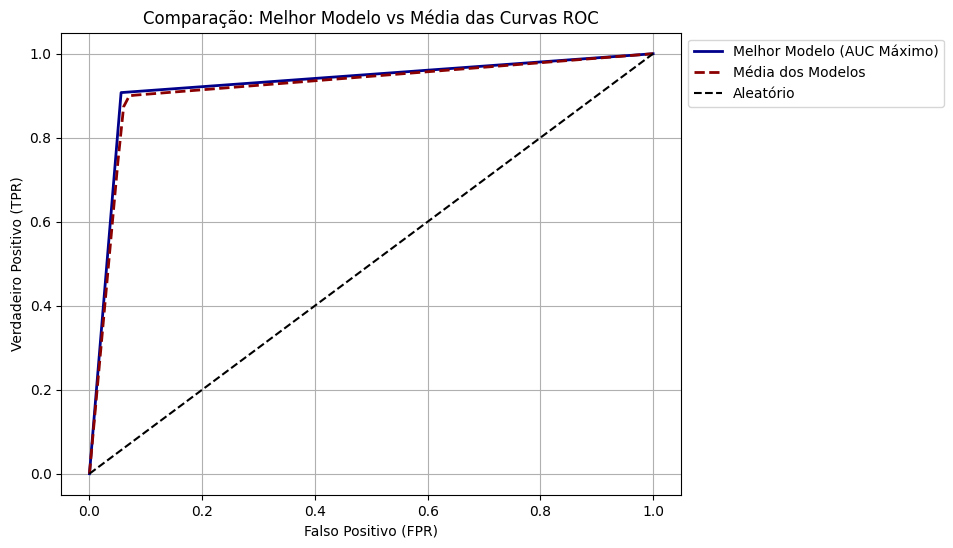

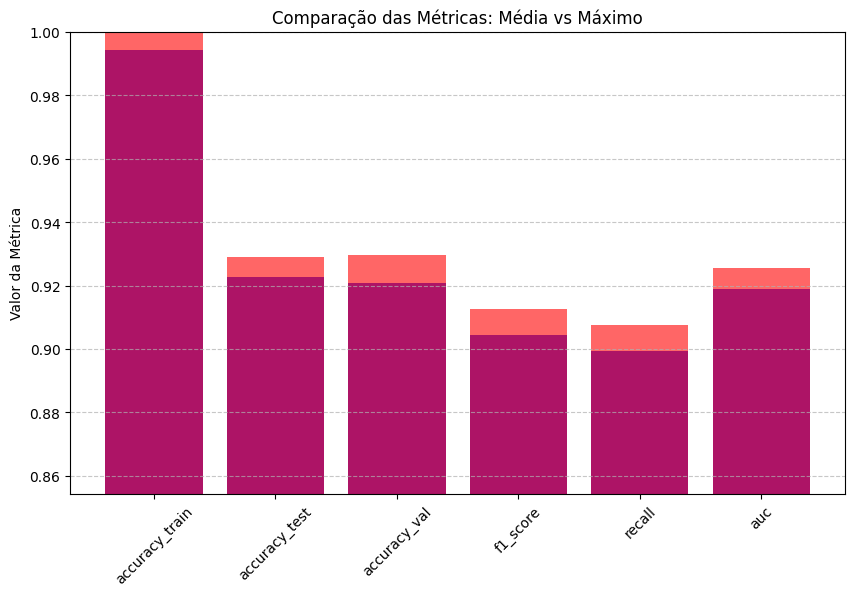

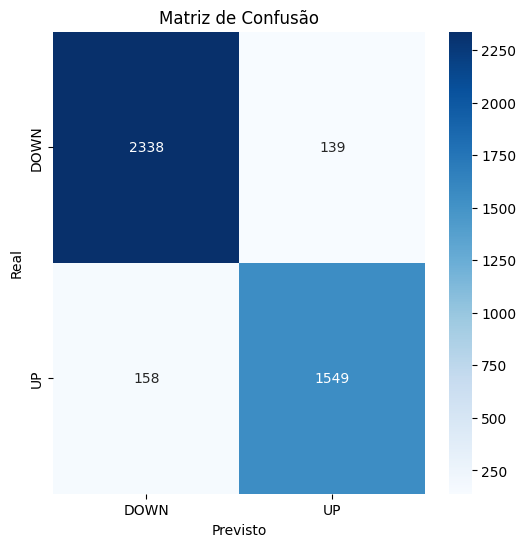

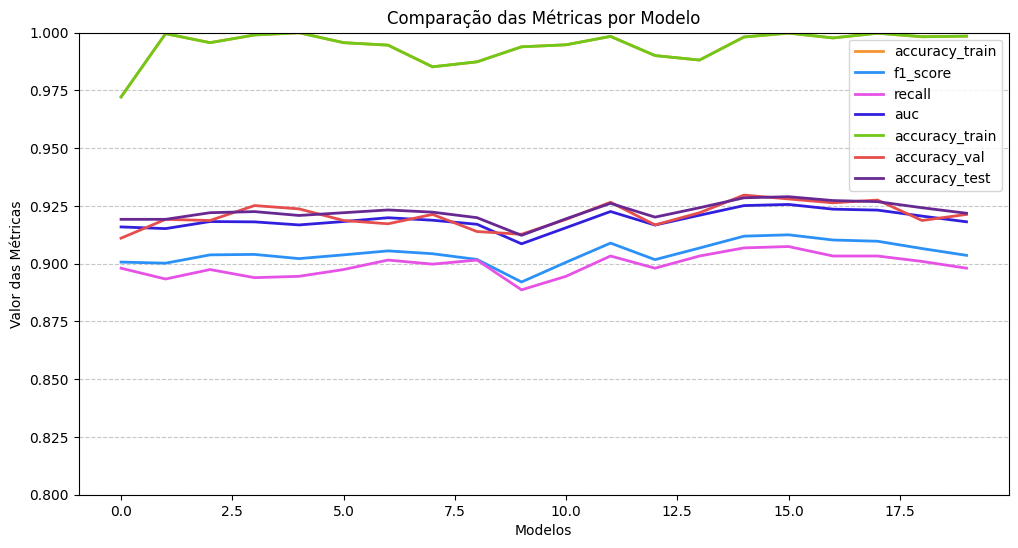

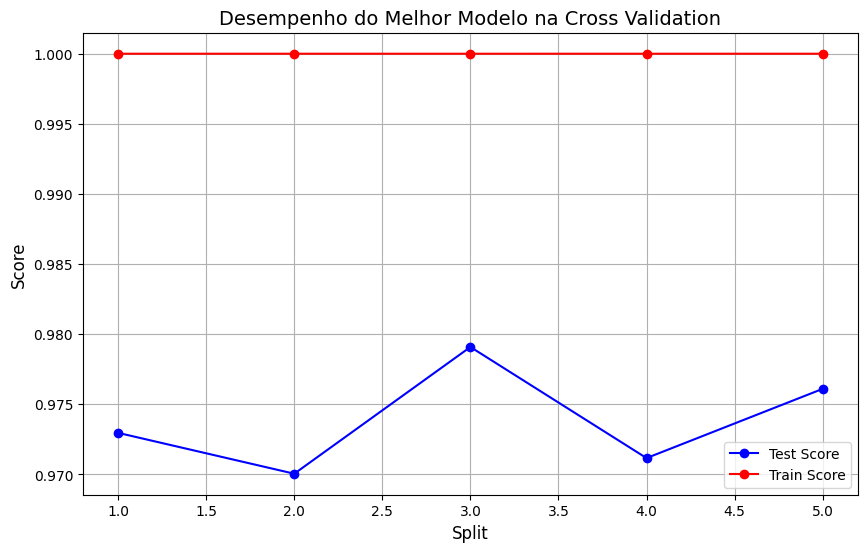

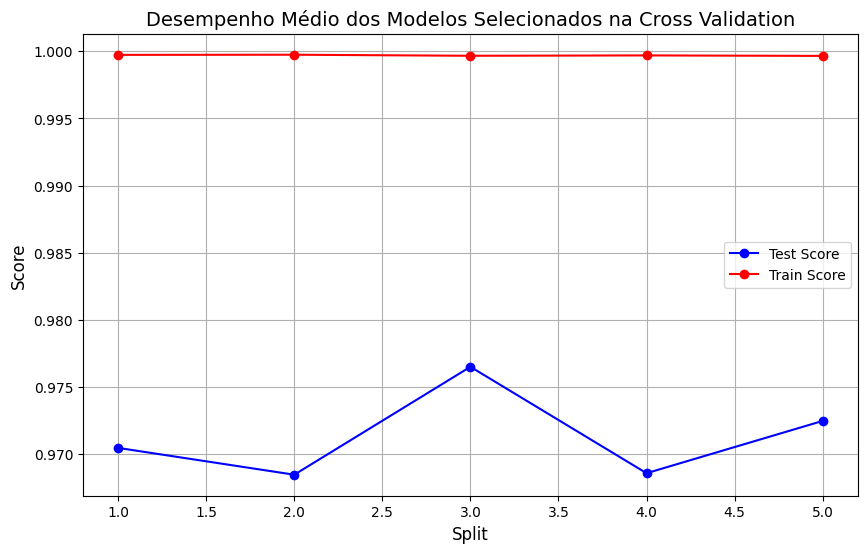

### Resultados do Modelo

**Melhores Parâmetros:**
```
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'feature_weights': None, 'gamma': 0.3, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 10, 'max_leaves': None, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 400, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 51, 'reg_alpha': 0.1, 'reg_lambda': 1, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}
```

#### Resultados das Métricas:
- **Accuracy train**:
  - **Melhor valor geral**: 1.0000
  - **Média**: 0.9944
  - **Desvio Padrão**: 0.0067
  - **Valor no Modelo Selecionado**: 0.9998

- **Accuracy val**:
  - **Melhor valor geral**: 0.9297
  - **Média**: 0.9209
  - **Desvio Padrão**: 0.0051
  - **Valor no Modelo Selecionado**: 0.9280

- **Accuracy test**:
  - **Melhor valor geral**: 0.9290
  - **Média**: 0.9226
  - **Desvio Padrão**: 0.0038
  - **Valor no Modelo Selecionado**: 0.9290

- **F1 score**:
  - **Melhor valor geral**: 0.9125
  - **Média**: 0.9046
  - **Desvio Padrão**: 0.0047
  - **Valor no Modelo Selecionado**: 0.9125

- **Auc**:
  - **Melhor valor geral**: 0.9257
  - **Média**: 0.9190
  - **Desvio Padrão**: 0.0039
  - **Valor no Modelo Selecionado**: 0.9257

- **Recall**:
  - **Melhor valor geral**: 0.9074
  - **Média**: 0.8993
  - **Desvio Padrão**: 0.0047
  - **Valor no Modelo Selecionado**: 0.9074



In [9]:
from IPython.display import display, Markdown

plots.show_best_roc(df)
plots.show_bar_metrics2(df)
plots.show_confusion_matrix(model, X_test, Y_test)
plots.show_metrics_comparison_line_plot(df)
plots.plot_cv_performance(cv, "Desempenho do Melhor Modelo na Cross Validation")
plots.plot_cv_performance(all_cv, "Desempenho Médio dos Modelos Selecionados na Cross Validation")
display(Markdown(util.generate_markdown_report(model, result.values())))